## Regresión

In [1]:
import pandas as pd

BDclase5 = pd.read_excel(r"C:\Users\DanielGP\OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA\Tendencias\Personal\Especialización\Materias\Estadística\Induccion - copia.xlsx")
BDclase5.head()

,VMATRI,PROM,HORAS,ESTRATO,TRAB,FAC,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,602089,3.2,23,4,SI,CIENCIAS,NaN,mu_VMATRI>600000,con sigma_VMATRI=
1,645860,3.3,32,4,SI,MINAS,NaN,NaN,NaN
2,230028,3.5,28,4,NO,AGRONOMIA,Ho:,mu_VMATRI<=600000,NaN
3,560515,4.2,24,3,NO,MINAS,Ha:,mu_VMATRI>600000,NaN
4,536309,3.2,28,3,SI,CIENCIAS,NaN,NaN,NaN


Regresión

                            OLS Regression Results                            
Dep. Variable:                   PROM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.939
Date:                Thu, 02 Oct 2025   Prob (F-statistic):              0.164
Time:                        14:15:01   Log-Likelihood:                -516.72
No. Observations:                1000   AIC:                             1037.
Df Residuals:                     998   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3291      0.056     59.668      0.0

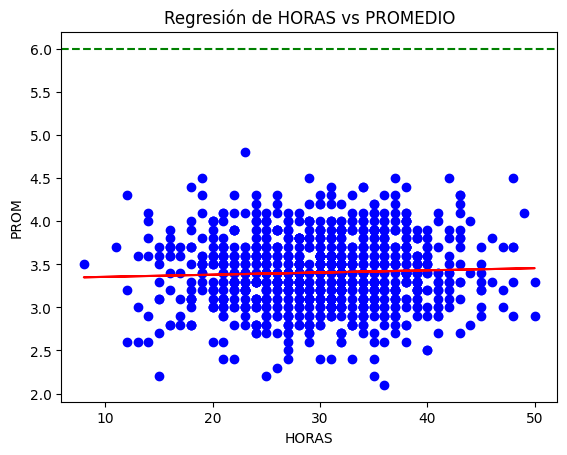

In [2]:
# Haciendo uso de la regresión, calcular si el promedio de horas es mayor a 20. Gráficar también.
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = BDclase5['HORAS']
y = BDclase5['PROM']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

plt.scatter(BDclase5['HORAS'], BDclase5['PROM'], color='blue')
plt.plot(BDclase5['HORAS'], predictions, color='red')
plt.axhline(y=6, color='green', linestyle='--')
plt.xlabel('HORAS')
plt.ylabel('PROM')
plt.title('Regresión de HORAS vs PROMEDIO')
plt.show()


Taller de clase

In [3]:
import pandas as pd
BDTallerClase = pd.read_csv(r"C:\Users\DanielGP\OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA\Tendencias\Personal\Especialización\Materias\Estadística\Base de datos.txt", sep=" ")
BDTallerClase.head()

,Y,X1,X2,X3,X4,X5
0,5.0,7.78,45.5,20.9,71.6,489
1,2.9,8.86,51.3,9.5,87.5,100
2,4.4,11.65,54.5,18.6,96.1,248
3,1.8,7.67,51.7,2.5,40.4,106
4,4.6,10.16,54.2,8.4,51.5,831


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     30.96
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           4.98e-07
Time:                        14:15:02   Log-Likelihood:                -98.374
No. Observations:                  69   AIC:                             200.7
Df Residuals:                      67   BIC:                             205.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9919      0.646      1.535      0.1

C:\Users\DanielGP\AppData\Local\Temp\ipykernel_25576\460342153.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_value = anova_table['F'][0]
C:\Users\DanielGP\AppData\Local\Temp\ipykernel_25576\460342153.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


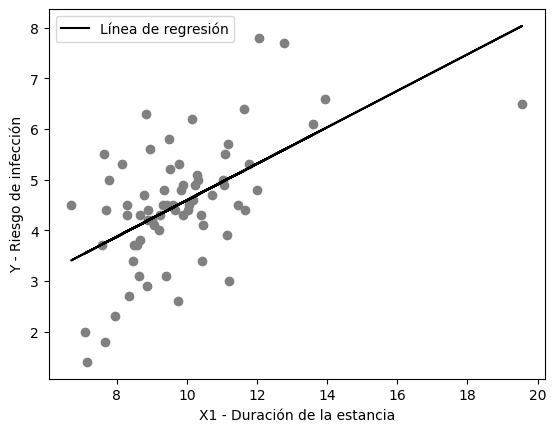

In [ ]:
import numpy as np

# En un estudio a gran escala realizado en EE.UU sobre la eficacia en el control de infecciones hopistalarias se recogió información en 113 hospitales.
# A su equipo de trabajo le corresponde analizar una muestra aleatoria de n hospitales que están dentro de un archivo de un texto adjunto,d donde n es el número de registros en el archivo asignado y X es el número de equipo asignado.
#La base de datos contiene las siguientes columnas - variables: calcular los betas, uno da 0.36  , 31% # coeficiente de correlación, se mide para mirar si la regresión está buena. 

# Y = Riesgo de infección Probabilidad promedio estimada de adquirir una infección en el hospital (en porcentaje)
#X1 = Duración de la estancia. Duración promedio de la estancia hospitalaria (en días)
#X2 = Rutina de cultivos. Razón del nuúmero de cultivos realizados en pacientes sin sintomas de infección hospitalaria por cada 100.
#X3 = Número de camas. Promedio de camas en el hospital durante el periodo del estudio.
#X4 = Censo promedio diario. Número promedio de pacientes el hospital por día durante el periodo de estudio
#X5 = Número de enfermeras. Número promedio de enfermeras de tiempo completo en el hospital durante el periodo del estudio.

# 1) Emplee el análisis de regresión líneal multiple y explique el riesgo de infección en término de las variables restantes (actuando como predictoras Xi).

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Usar la API de fórmulas para evitar el error de design_info
model = smf.ols('Y ~ X1', data=BDTallerClase).fit()
predictions = model.predict(BDTallerClase)
print(model.summary())

#Calculamos las betas
betas = model.params
print(f'Betas: {betas}')

#Calculamos el coeficiente de correlación
correlation_matrix = np.corrcoef(BDTallerClase['X1'], BDTallerClase['Y'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f'Coeficiente de correlación (R^2): {r_squared}')

#Hallamos la tabla anova 
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#prueba de significancia de la regresión
f_value = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
print(f'F-valor: {f_value}')
print(f'P-valor: {p_value}')

#Gráficamos la regresión lineal entre X1 y Y
plt.scatter(BDTallerClase['X1'], BDTallerClase['Y'], color='gray')
plt.xlabel('X1 - Duración de la estancia')
plt.ylabel('Y - Riesgo de infección')
plt.plot(BDTallerClase['X1'], predictions, color='black', label='Línea de regresión')
plt.legend()
plt.show() 

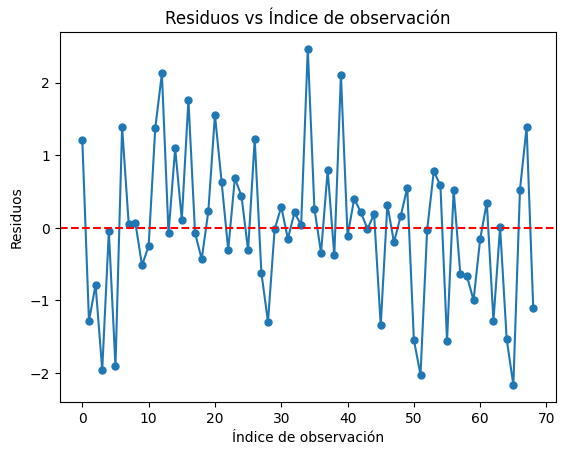

In [5]:
#Validación de supuestos de la regresión
residuals = model.resid
orden = np.arange(len(residuals))

#Graficamos solo los residuos en una gráfica con puntos únicos por líneas
plt.plot(orden, residuals, 'o-',markersize=5)
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel('Índice de observación')
plt.ylabel('Residuos')
plt.title('Residuos vs Índice de observación')
plt.show()

Estadístico de Shapiro-Wilk: 0.9791403719222306, p-valor: 0.3023259078429156
Los residuos parecen seguir una distribución normal (no se rechaza H0)


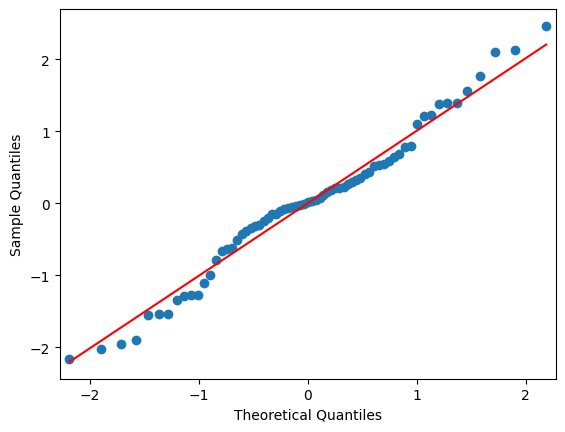

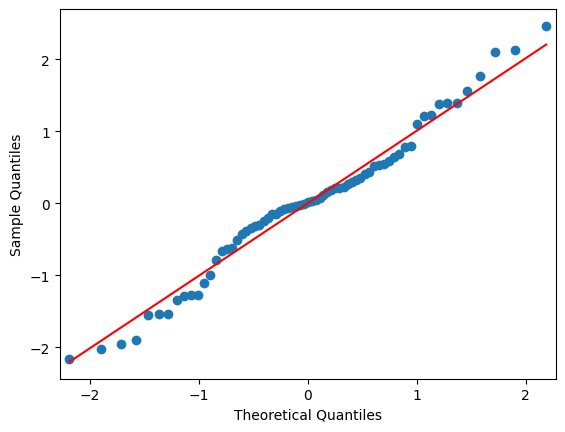

In [6]:
#Calculamos normalidad de los residuos con un QQ plot   #Nota: SE LE DEBEN QUITAR LOS DATOS ATIPICOS
from statsmodels.graphics.gofplots import qqplot    

from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f'Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los residuos parecen seguir una distribución normal (no se rechaza H0)")

qqplot(residuals, line='s')

{'Lagrange multiplier statistic': np.float64(0.02233245797158967), 'p-value': np.float64(0.8812060695123798), 'f-value': np.float64(0.021692161208332433), 'f p-value': np.float64(0.883351285503287)}


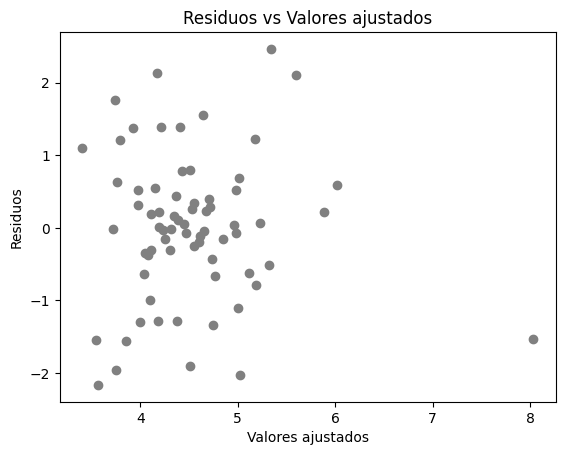

In [7]:
#Calculamos homocedasticidad con el test de Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


#Calculamos la varianza constante de los residuos
fitted_vals = model.fittedvalues
plt.scatter(fitted_vals, residuals, color='gray')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados')
plt.show()

In [8]:
#Hallamos la linealidad del modelo con un gráfico de dispersión


In [9]:
#Hacemos el calculo de la formula Y = mX + b
#donde m es la pendiente, X es la variable independiente y b es la intersección con el eje Y
m = betas['X1']
b = betas['Intercept']
x = 10

Y = m * x + b
print(f'Para X1 = {x}, el valor predicho de Y es: {Y}')
print(m)
print(b)

Para X1 = 10, el valor predicho de Y es: 4.592006931876395
0.3600059362753005
0.9919475691233905


### CLASE 6



Taller de clase 2 - regresión multiple

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     20.87
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           3.09e-12
Time:                        14:15:02   Log-Likelihood:                -77.779
No. Observations:                  69   AIC:                             167.6
Df Residuals:                      63   BIC:                             181.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2449      1.231     -0.199      0.8

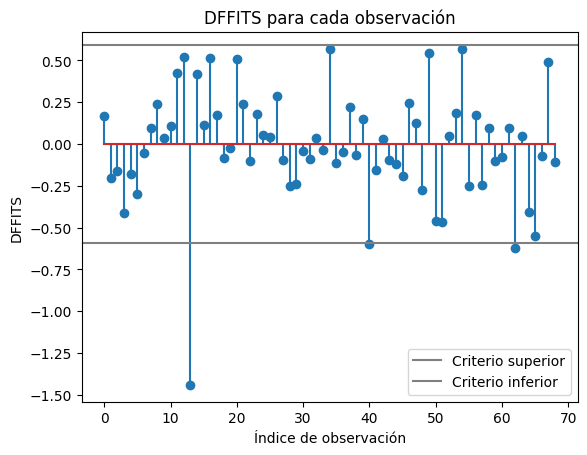

In [10]:
#Aplicar la regresión múltiple con todas las variables predictoras usando la API de fórmulas
import statsmodels.formula.api as smf

model = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5', data=BDTallerClase).fit()
predictions = model.predict(BDTallerClase)
print(model.summary())
print("\n" + "="*60 + "\n")
print("Tabla Anova:\n")

#Hallamos la tabla anova
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#Calculamos los betas
betas = model.params
print("\n" + "="*60 + "\n")
print(f'Betas: {betas}')

#Calulamos la suma de cuadrado de la regresión (SSR)
SSR = model.ess
print("\n" + "="*60 + "\n")
print("SSR value:\n")
print(SSR)

#Calculamos la suma de cuadrados del error (SSE)
SSE = anova_table['sum_sq']['Residual']
print("\n" + "="*60 + "\n")
print("SSE value:\n")
print(SSE)

SCT = SSR + SSE

#Calculamos el MSE  - Cuadrado medio del error
MSE = SSE / anova_table['df']['Residual']
print("\n" + "="*60 + "\n")
print("MSE value:\n")
print(MSE)

#Calculamos el RMSE - Raíz del cuadrado medio del error
RMSE = np.sqrt(MSE)
print("\n" + "="*60 + "\n")
print("RMSE value:\n")
print(RMSE)

#Calculamos el Cp de Mallows con SSE_P /MSE completo - (n - 2p)
n = len(BDTallerClase)
p = model.df_model + 1
MSE_full = model.mse_resid
Cp = SSE / MSE_full - (n - 2 * p)
print("\n" + "="*60 + "\n")
print("Cp de Mallows:\n")
print(Cp)

#Calculamos los valores atipicos aplicando la división de los residuales entre el RMSE
Atipicos = abs(residuals / RMSE)
print("\n" + "="*60 + "\n")
print("Valores atípicos:\n")
print(Atipicos)
Numero_Atipicos = len(Atipicos[Atipicos > 3])
print(f'Número de valores atípicos (|residual/RMSE| > 3): {Numero_Atipicos}')

#Ahora hallamos cual de estos es el valor atipico
Atipicos_Valores = Atipicos[Atipicos > 3]
print("\n" + "="*60 + "\n")
print("Valores atípicos:\n")
print(Atipicos_Valores)


#Calculamos los puntos de balanceo  / Espacio predictor que se aleja del resto de los datos
Puntos_Balanceo = model.get_influence().hat_matrix_diag
print("\n" + "="*60 + "\n")
print("Puntos de balanceo:\n")
print(Puntos_Balanceo)

#Se aplica la regla de 2*(k+1)/n para encontrar los puntos de balanceo
n = len(BDTallerClase)
k = model.df_model
Criterio = 2 * (k + 1) / n
Puntos_Balanceo_altos = Puntos_Balanceo[Puntos_Balanceo > Criterio]
Numero_Puntos_Balanceo = len(Puntos_Balanceo_altos)
print(f'Número de puntos de balanceo (hat > {Criterio}): {Numero_Puntos_Balanceo}')
print("\n" + "="*60 + "\n") 
print("Puntos de balanceo altos:\n")
print(Puntos_Balanceo_altos)

#Calculamos los datos studentizados de los residuos 
DatosStudentizados = model.get_influence().resid_studentized_external
print("\n" + "="*60 + "\n")
print("Datos studentizados de los residuos:\n")
print(abs(DatosStudentizados))

# Hallamos la influencia con la distancia de Cook
Distancia_Cook = model.get_influence().cooks_distance[0]
print("\n" + "="*60 + "\n")
print("Distancia de Cook:\n")
print(Distancia_Cook)

#Definimos los puntos influentes si Di > 1
Puntos_Influyentes = Distancia_Cook[Distancia_Cook > 1]
Numero_Puntos_Influyentes = len(Puntos_Influyentes)
print("\n" + "="*60 + "\n")
print(f'Número de puntos influyentes (Di > 1): {Numero_Puntos_Influyentes}')
print("Puntos influyentes:\n")
print(Puntos_Influyentes)

#Calculamos el criterio con los DFFITS
DFFITS = model.get_influence().dffits[0]  
print("\n" + "="*60 + "\n")
print("DFFITS:\n")

# Aplicamos el criterio de |DFFITS| > 2*sqrt((k+1)/n)
n = len(BDTallerClase)
k = model.df_model
Criterio = 2 * np.sqrt((k + 1) / n)
Puntos_DFFITS = DFFITS[abs(DFFITS) > Criterio]
Numero_Puntos_DFFITS = len(Puntos_DFFITS)
print(f'Número de puntos influyentes (|DFFITS| > {Criterio}): {Numero_Puntos_DFFITS}')
print(f" los puntos DFFITS son:\n{abs(Puntos_DFFITS)}")

#Graficamos los DFFITS
plt.stem(np.arange(len(DFFITS)), DFFITS)
plt.axhline(y=Criterio, color='gray', linestyle='-', label='Criterio superior')
plt.axhline(y=-Criterio, color='gray', linestyle='-', label='Criterio inferior')
plt.xlabel('Índice de observación')
plt.ylabel('DFFITS')
plt.title('DFFITS para cada observación')
plt.legend()
plt.show()


Modelo sin influentes



Resumen del modelo sin puntos influyentes:

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     28.07
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.53e-14
Time:                        14:15:02   Log-Likelihood:                -67.595
No. Observations:                  66   AIC:                             147.2
Df Residuals:                      60   BIC:                             160.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

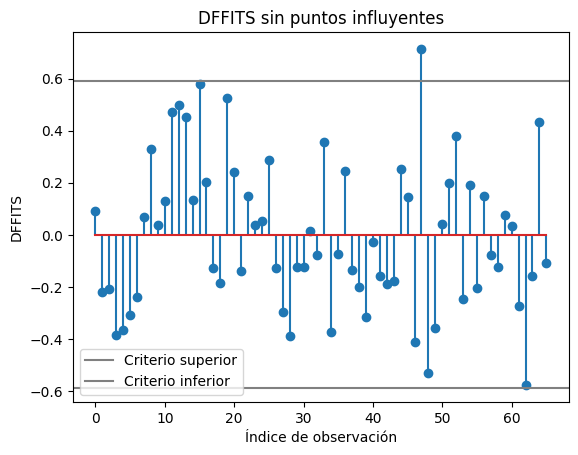

In [11]:
#Ahora corremos el modelo sin los tres datos influyentes que encontramos [1.44121551 0.60054529 0.62310955]
indices_influyentes = np.where(abs(DFFITS) > Criterio)[0]
Regresion_sin_influyentes = BDTallerClase.drop(indices_influyentes)
model_sin_influyentes = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5', data=Regresion_sin_influyentes).fit()
print("\n" + "="*60 + "\n")
print("Resumen del modelo sin puntos influyentes:\n")
print(model_sin_influyentes.summary())

#Graficamos los DFFITS sin los puntos influyentes
DFFITS_sin_influyentes = model_sin_influyentes.get_influence().dffits[0]
plt.stem(np.arange(len(DFFITS_sin_influyentes)), DFFITS_sin_influyentes)
plt.axhline(y=Criterio, color='gray', linestyle='-', label='Criterio superior')
plt.axhline(y=-Criterio, color='gray', linestyle='-', label='Criterio inferior')
plt.xlabel('Índice de observación') 
plt.ylabel('DFFITS')
plt.title('DFFITS sin puntos influyentes')
plt.legend()
plt.show()  

Tabla de todas las regresiones posibles

In [12]:
from itertools import combinations

def all_reg_table(X, y, max_vars=6):
    import statsmodels.api as sm
    results = []
    variables = X.columns[1:]  # Excluir constante si la hay (asumiendo X tiene columna 'const' o similar)
    for k in range(1, min(len(variables), max_vars) + 1):
        for combo in combinations(variables, k):
            combo_vars = list(combo)
            X_combo = X[['const'] + combo_vars] 
            model_combo = sm.OLS(y, X_combo).fit()
            n= len(y)
            p = k + 1 
            SCR = model_combo.ess
            SSE = model_combo.ssr
            MSE = model_combo.mse_resid
            RMSE = np.sqrt(MSE)
            Cp = SSE / MSE - (n - 2 * p)
            P = model_combo.pvalues
            results.append({
                'variables': combo,
                'R2': model_combo.rsquared,
                'Adj_R2': model_combo.rsquared_adj,
                'SCR': SCR,
                'SSE': SSE,
                'MSE': MSE,
                'RMSE': RMSE,
                'p': P,
                'Cp': Cp
            })
    return results
print("\n" + "="*60 + "\n")
print("Tabla de todas las regresiones posibles:\n")
X = BDTallerClase[['X1', 'X2', 'X3', 'X4', 'X5']]
X = sm.add_constant(X) 
y = BDTallerClase['Y']
Posible_Regresiones = all_reg_table(X, y)
Resultados_Posibles_Regresiones = pd.DataFrame(Posible_Regresiones).head(10)
print(Resultados_Posibles_Regresiones)

#corregir el cp y el pvalue




Tabla de todas las regresiones posibles:

  variables        R2    Adj_R2        SCR         SSE       MSE      RMSE  \
0     (X1,)  0.316071  0.305863  32.322361   69.940538  1.043889  1.021709   
1     (X2,)  0.011488 -0.003266   1.174836  101.088062  1.508777  1.228323   
2     (X3,)  0.421657  0.413025  43.119838   59.143060  0.882732  0.939538   
3     (X4,)  0.208130  0.196311  21.283949   80.978950  1.208641  1.099382   
4     (X5,)  0.083194  0.069511   8.507703   93.755196  1.399331  1.182933   
5  (X1, X2)  0.319130  0.298497  32.635135   69.627763  1.054966  1.027115   
6  (X1, X3)  0.573988  0.561079  58.697713   43.565185  0.660079  0.812452   
7  (X1, X4)  0.363706  0.344425  37.193647   65.069252  0.985898  0.992924   
8  (X1, X5)  0.336221  0.316107  34.382947   67.879952  1.028484  1.014142   
9  (X2, X3)  0.456184  0.439705  46.650685   55.612213  0.842609  0.917938   

                                                   p   Cp  
0  const    1.296061e-01
X1       4.9

Multicolinealidad



Matriz de correlación del modelo sin puntos influyentes:

           Intercept        X1        X2        X3        X4        X5
Intercept   1.000000  0.601091 -0.999877 -0.997035 -0.985070 -0.973769
X1          0.601091  1.000000 -0.613304 -0.646561 -0.720398 -0.765010
X2         -0.999877 -0.613304  1.000000  0.997849  0.987254  0.977009
X3         -0.997035 -0.646561  0.997849  1.000000  0.989714  0.984200
X4         -0.985070 -0.720398  0.987254  0.989714  1.000000  0.996888
X5         -0.973769 -0.765010  0.977009  0.984200  0.996888  1.000000


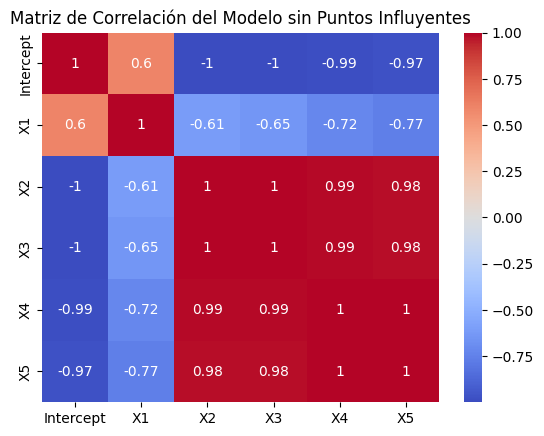

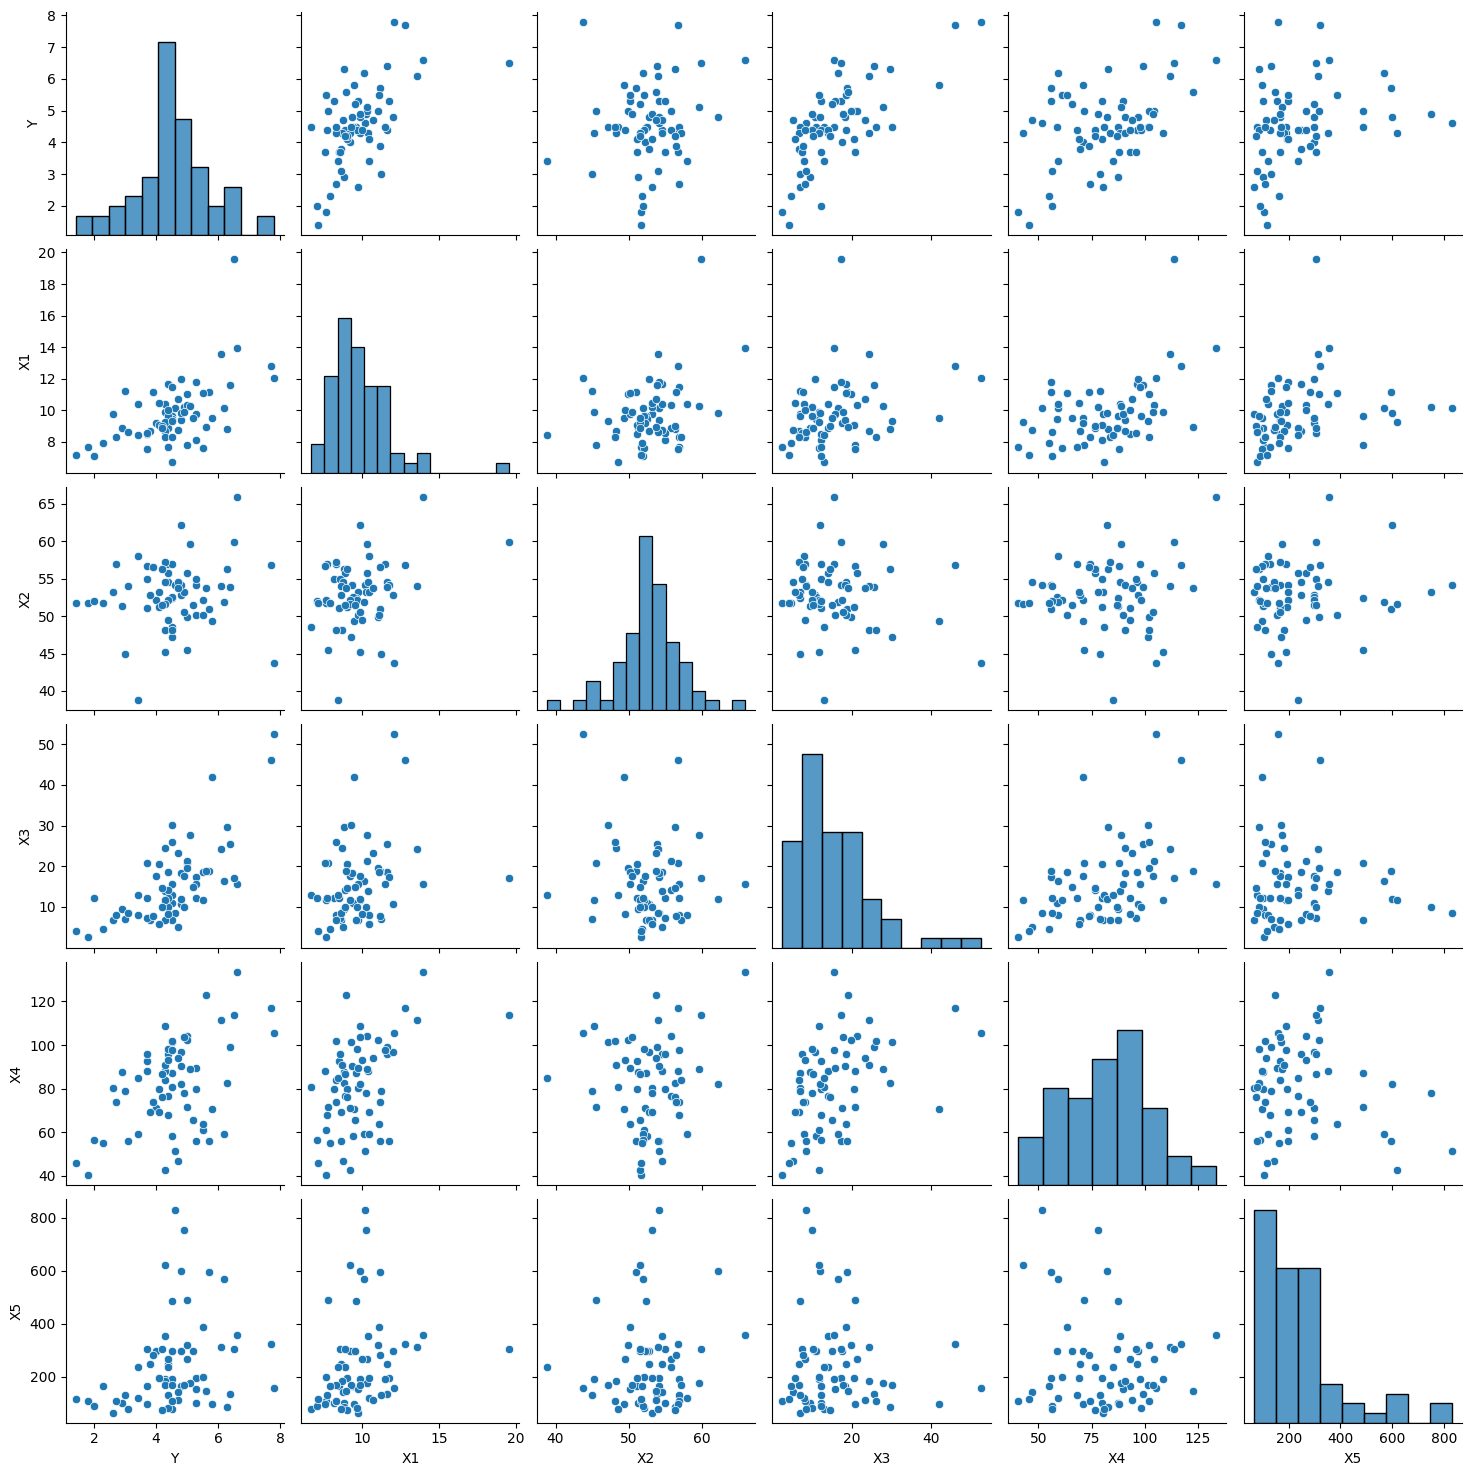



VIF - Factor de inflación de la varianza:

  variable        VIF
0       X1  43.659929
1       X2  33.083096
2       X3   4.885619
3       X4  26.974258
4       X5   3.667947
3
Hay multicolinealidad severa en las variables en las variables ['X1', 'X2', 'X4']
 No hay multicolinealidad en las variables ['X3', 'X5']
Número de Condición: 15905888.119757948


Índices de condición:

Índice de condición para la variable 0: 1.0
Índice de condición para la variable 1: 5.228829946887466
Índice de condición para la variable 2: 28.626287670342112
Índice de condición para la variable 3: 38.078408453213314
Índice de condición para la variable 4: 3988.21866498791
Índice de condición para la variable 5: 203.21965438936627


In [ ]:
#Hallamos la covarianza del modelo sin los datos influyentes 
Covarianza = model_sin_influyentes.cov_params()

Correlacion = Covarianza.corr()
print("\n" + "="*60 + "\n") 
print("Matriz de correlación del modelo sin puntos influyentes:\n")
print(Correlacion)

#Graficamos una matriz de dispersión 
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación del Modelo sin Puntos Influyentes')

#Realizamos una matriz de dispersión para observar la multicolinealidad
sns.pairplot(Regresion_sin_influyentes)
plt.show()


#Calculamos el VIF - Factor de inflación de la varianza
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
	vif_data = pd.DataFrame()
	vif_data["variable"] = X.columns
	vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
	return vif_data
X_variables = Regresion_sin_influyentes[['X1', 'X2', 'X3', 'X4', 'X5']]
vif_result = calculate_vif(X_variables)
print("\n" + "="*60 + "\n")
print("VIF - Factor de inflación de la varianza:\n")
print(vif_result)
print(len(vif_result[vif_result['VIF'] > 10]))
if len(vif_result[vif_result['VIF'] > 10]) > 0:
    print(f"Hay multicolinealidad severa en las variables en las variables {vif_result[vif_result['VIF'] > 10]['variable'].tolist()}")
if len(vif_result[vif_result['VIF'] < 5]) > 0:
    print(f" No hay multicolinealidad en las variables {vif_result[vif_result['VIF'] < 5]['variable'].tolist()}")
    
#Calculamos el Número de Condición con k = lambda max / lambda min, y lambda siendo los valores propios de la matriz de correlación

X_matriz = model_sin_influyentes.model.exog
#Hacemos el cálculo con la transpuesta de la matriz x_matriz
eigenvalues, _ = np.linalg.eig(np.dot(X_matriz.T, X_matriz))
k = np.max(eigenvalues) / np.min(eigenvalues)
print(f'Número de Condición: {k}')

#Calculamos el índice de condición que es el cuadrado de k para cada variable
print("\n" + "="*60 + "\n") 
print("Índices de condición:\n")
for i in range(X_matriz.shape[1]):
	eigenvalue = eigenvalues[i]
	condition_index = (np.max(eigenvalues) / eigenvalue)**0.5
	print(f'Índice de condición para la variable {i}: {condition_index}')
